In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading and reading datset
sales=pd.read_excel("Sales Dataset  (1).xlsx")
sales.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11 00:00:00,2017-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06 00:00:00,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
#calculating categorical columns
#sales.value_counts("Ship Mode")
categorical_columns = ['Customer Name', 'Ship Mode', 'Segment','City','State','Category','Sub-Category','Product Name']

# Calculate value counts for each categorical column
value_counts_dict = {}
for col in categorical_columns:
    value_counts_dict[col] = sales[col].value_counts()
print(value_counts_dict)


{'Customer Name': William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: Customer Name, Length: 793, dtype: int64, 'Ship Mode': Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64, 'Segment': Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64, 'City': New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64, 'State': California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washingto

In [10]:
#statiscal analysis of numerical columns
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
#Data validation
#This dataset set is in the right data types
sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [16]:
sales.value_counts("Ship Mode")

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
dtype: int64

In [27]:
#validating categorical data
#sales.value_counts("Ship Mode")
#sales["Ship Mode"].isin(["Standard Class"])
#the code below ilters the rows of ship column to print only row with standard class 
sales[sales["Ship Mode"].isin(["Standard Class"])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3,4,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10 00:00:00,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,2015-09-06 00:00:00,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,2015-09-06 00:00:00,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,2015-09-06 00:00:00,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-12-01 00:00:00,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-12-01 00:00:00,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-12-01 00:00:00,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [29]:
#selecting and viewing numerical columns
sales.select_dtypes("number").head()

,Row ID,Postal Code,Sales
0,1,42420.0,261.9600
1,2,42420.0,731.9400
2,3,90036.0,14.6200
3,4,33311.0,957.5775
4,5,33311.0,22.3680


In [35]:
#checking the maximum avalues in numerical columns
max_value_sales= sales["Sales"].max()
print(f"the maximum value is {max_value_sales}")
min_value_sales=sales["Sales"].min()
print(f"the minimum value is {min_value_sales}")

the maximum value is 22638.48
the minimum value is 0.444


<Axes: xlabel='Sales'>

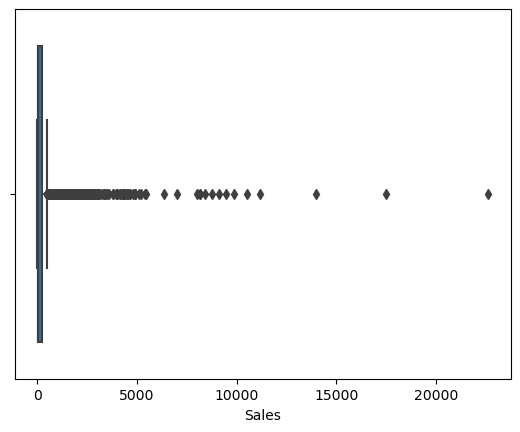

In [36]:
#we can also check the max and min using bos plot
sns.boxplot(data=sales,x="Sales")

<Axes: xlabel='Sales', ylabel='Ship Mode'>

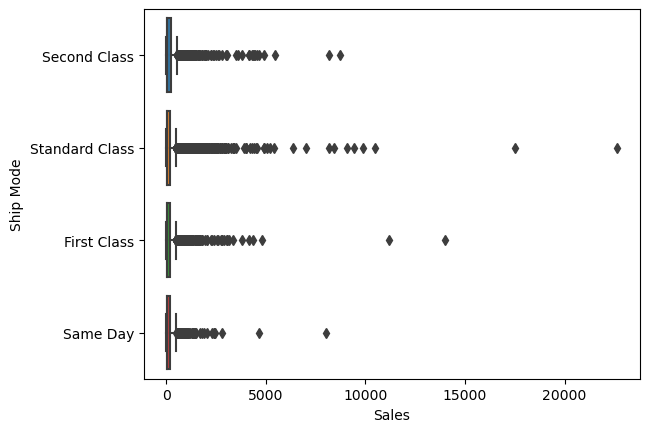

In [38]:
sns.boxplot(data=sales,x="Sales", y="Ship Mode")

In [41]:
#Data Summarisation
sales.groupby("Ship Mode").mean("Sales")

,Row ID,Postal Code,Sales
Ship Mode,,,
First Class,4751.937375,54937.705530,230.228020
Same Day,5084.442379,57459.968401,232.749143
Second Class,4824.502103,55633.082062,236.547939
Standard Class,4946.340502,55041.392546,228.849856


In [42]:
#aggregating functions
sales.agg(["mean","std"])

C:\Users\HP\AppData\Local\Temp\ipykernel_27564\97540989.py:2: FutureWarning: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sales.agg(["mean","std"])


,Row ID,Postal Code,Sales
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875


In [44]:
sales.agg({"Sales":["mean","std"]})

,Sales
mean,230.769059
std,626.651875


In [51]:
avg_sales_shipmode= sales.groupby("Ship Mode").agg(avg_sales=("Sales","mean"),std_sales=("Sales","std"))

In [52]:
avg_sales_shipmode

,avg_sales,std_sales
Ship Mode,,
First Class,230.228020,636.898300
Same Day,232.749143,546.497352
Second Class,236.547939,560.944528
Standard Class,228.849856,650.773802


<Axes: xlabel='Ship Mode', ylabel='Sales'>

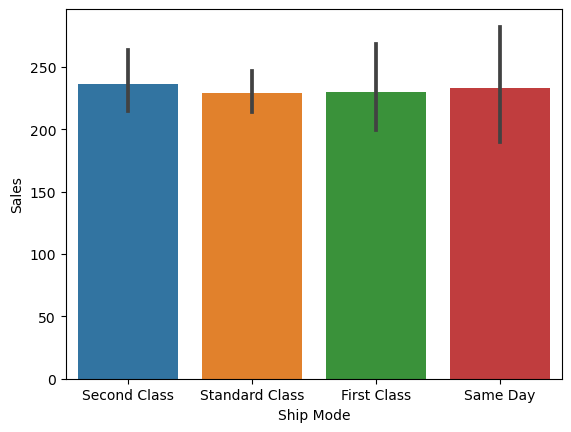

In [53]:
#Visualizing categorical data
sns.barplot(data=sales,x="Ship Mode",y="Sales")

# addressing mising Data

In [55]:
#checking for missing values
sales.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [56]:
sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

# learning how to handle missing data

In [84]:

# create a DataFrame with missing values
df = {'Name': ['John', 'Joseph', 'Mary', 'Mark', 'John', 'Mike'], 'Age': [25, 33, None, 28, 29, 35], 'Salary': [50000, None, 60000, 55000, 70000, 65000]}

df = pd.DataFrame(df)

# check for missing values
df.head()

,Name,Age,Salary
0,John,25.0,50000.0
1,Joseph,33.0,NaN
2,Mary,NaN,60000.0
3,Mark,28.0,55000.0
4,John,29.0,70000.0


In [63]:
#checking for the number of null values in each column
print(df.isna().sum())

Name      0
Age       1
Salary    1
dtype: int64


In [65]:
#checking for the null values
print(df.isnull())

    Name    Age  Salary
0  False  False   False
1  False  False    True
2  False   True   False
3  False  False   False
4  False  False   False
5  False  False   False


In [66]:
#checking for non-null values
print(df.notnull())

   Name    Age  Salary
0  True   True    True
1  True   True   False
2  True  False    True
3  True   True    True
4  True   True    True
5  True   True    True


#Dropping Missing values
#One way to handle missing values is to drop the rows or columns that contain missing values. The dropna() method in pandas can be used to drop rows or columns that contain missing values. By default, it drops rows that contain at least one missing value.

In [67]:
#this will drop all rows containing the null values
df_dropped=df.dropna()

In [68]:
print(df_dropped)

    Name   Age   Salary
0   John  25.0  50000.0
3   Mark  28.0  55000.0
4  David  29.0  70000.0
5   Mike  35.0  65000.0


In [70]:
#this will drop columns containig null values by setting axis to 1
df_drop=df.dropna(axis=1)

In [71]:
print(df_drop)

     Name
0    John
1  Joseph
2    Mary
3    Mark
4   David
5    Mike


Filling/replacing missing values
If your dataset has a large number of missing values, it may be more appropriate to replace them with other values. Pandas provides several methods to replace missing values, including fillna() and replace(). The fillna() method replaces missing values with a specified value or with values from a specified method. The replace() method replaces specified values with other values.

In [73]:
df_filled=df.fillna(0)
print(df_filled)#this replaces all null values with 0

     Name   Age   Salary
0    John  25.0  50000.0
1  Joseph  33.0      0.0
2    Mary   0.0  60000.0
3    Mark  28.0  55000.0
4   David  29.0  70000.0
5    Mike  35.0  65000.0


In [75]:
#replacing null values with the mean
df_fill=df.fillna(df["Age"].mean())
print(df_fill)

     Name   Age   Salary
0    John  25.0  50000.0
1  Joseph  33.0     30.0
2    Mary  30.0  60000.0
3    Mark  28.0  55000.0
4   David  29.0  70000.0
5    Mike  35.0  65000.0


In [76]:
#Replcae specified values with other values
df_replace=df.replace({"Mary":"Johns"})
print(df_replace)

     Name   Age   Salary
0    John  25.0  50000.0
1  Joseph  33.0      NaN
2   Johns   NaN  60000.0
3    Mark  28.0  55000.0
4   David  29.0  70000.0
5    Mike  35.0  65000.0


In [82]:
df_duplicates=df.drop_duplicates()

In [83]:
df_duplicates

,Name,Age,Salary
0,John,25.0,50000.0
1,Joseph,33.0,NaN
2,Mary,NaN,60000.0
3,Mark,28.0,55000.0
4,John,29.0,70000.0
5,Mike,35.0,65000.0
